In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('CreditPrediction.csv').drop('Unnamed: 19', axis='columns')
print(df.shape)
df.head(10)

(10167, 19)


,CLIENTNUM,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,45.0,M,3,High School,Married,$60K - $80K,Blue,39.0,5.0,1,3,12691.0,777,1.335,1144,42,1.625,0.061
1,818770008,49.0,F,5,Graduate,NaN,Less than $40K,Blue,44.0,6.0,1,2,8256.0,864,1.541,1291,33,3.714,0.105
2,713982108,51.0,M,3,Graduate,Married,$80K - $120K,Blue,36.0,4.0,1,0,3418.0,0,2.594,1887,20,2.333,0.000
3,769911858,40.0,F,4,High School,NaN,Less than $40K,Blue,34.0,3.0,4,1,3313.0,2517,1.405,1171,20,2.333,0.760
4,709106358,40.0,M,3,Uneducated,Married,$60K - $80K,NaN,21.0,5.0,1,0,4716.0,0,2.175,816,28,2.500,0.000
5,713061558,44.0,M,2,Graduate,Married,$40K - $60K,Blue,36.0,3.0,1,2,4010.0,1247,1.376,1088,24,0.846,0.311
6,810347208,51.0,M,4,Unknown,Married,$120K +,Gold,46.0,6.0,1,3,34516.0,2264,1.975,1330,31,0.722,0.066
7,818906208,32.0,M,0,High School,Unknown,$60K - $80K,Silver,27.0,2.0,2,2,29081.0,1396,2.204,1538,36,0.714,0.048
8,710930508,37.0,M,3,Uneducated,Single,$60K - $80K,NaN,36.0,5.0,2,0,22352.0,2517,3.355,1350,24,1.182,0.113
9,719661558,48.0,M,2,Graduate,Single,$80K - $120K,Blue,36.0,6.0,3,3,11656.0,1677,1.524,1441,32,0.882,0.144


In [3]:
# Drop Unwanted Columns
df = df.drop('CLIENTNUM', axis='columns') # Identifier, not typically used as a feature for analysis

In [4]:
# Remove Duplicated Rows
df.drop_duplicates(keep='first', inplace=True, ignore_index=True)
print(df.shape)

(10132, 18)


In [5]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
Numerical columns : ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']


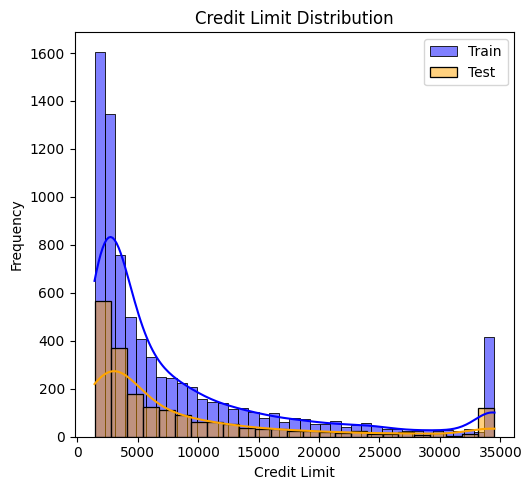

In [6]:
# Split the data
train_df, test_df = train_test_split(df, test_size=0.2, shuffle=True, random_state=42)

# Plot the distributions
plt.figure(figsize=(10, 5))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(train_df['Credit_Limit'], kde=True, color='blue', label='Train')
sns.histplot(test_df['Credit_Limit'], kde=True, color='orange', label='Test')
plt.title('Credit Limit Distribution')
plt.xlabel('Credit Limit')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

In [7]:
nan_counts = train_df.isna().sum().sort_values(ascending=False)
summary = pd.concat([train_df.info(), nan_counts], axis=0)
summary

<class 'pandas.core.frame.DataFrame'>
Index: 8105 entries, 4984 to 7270
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8105 non-null   float64
 1   Gender                    7947 non-null   object 
 2   Dependent_count           8105 non-null   int64  
 3   Education_Level           8105 non-null   object 
 4   Marital_Status            6576 non-null   object 
 5   Income_Category           8105 non-null   object 
 6   Card_Category             6586 non-null   object 
 7   Months_on_book            7921 non-null   float64
 8   Total_Relationship_Count  8087 non-null   float64
 9   Months_Inactive_12_mon    8105 non-null   int64  
 10  Contacts_Count_12_mon     8105 non-null   int64  
 11  Credit_Limit              8105 non-null   float64
 12  Total_Revolving_Bal       8105 non-null   int64  
 13  Total_Amt_Chng_Q4_Q1      8105 non-null   float64
 14  Total_Tran

Marital_Status              1529
Card_Category               1519
Months_on_book               184
Gender                       158
Total_Relationship_Count      18
Customer_Age                   0
Total_Revolving_Bal            0
Total_Ct_Chng_Q4_Q1            0
Total_Trans_Ct                 0
Total_Trans_Amt                0
Total_Amt_Chng_Q4_Q1           0
Months_Inactive_12_mon         0
Credit_Limit                   0
Contacts_Count_12_mon          0
Income_Category                0
Education_Level                0
Dependent_count                0
Avg_Utilization_Ratio          0
dtype: int64

In [8]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head()

,Total,%
Marital_Status,1529,18.9
Card_Category,1519,18.7
Months_on_book,184,2.3
Gender,158,1.9
Total_Relationship_Count,18,0.2


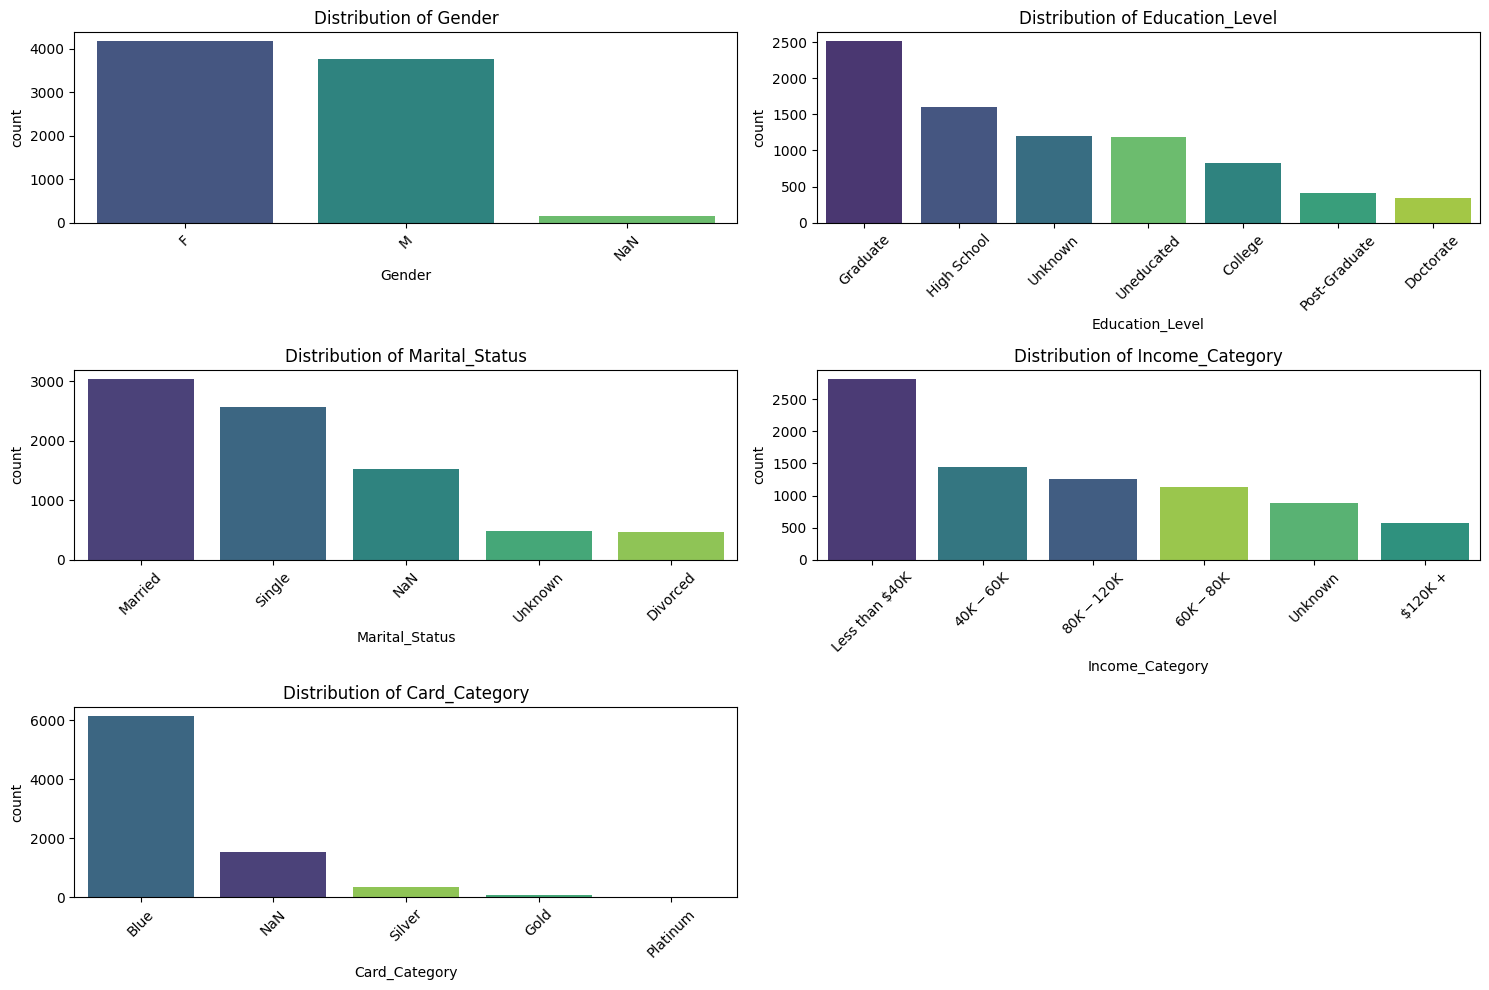

In [9]:
train_df_copy = train_df.copy()
categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']
train_df_copy[categorical_features] = train_df_copy[categorical_features].fillna('NaN')

# Plot bar plots for each categorical feature including NaN values
plt.figure(figsize=(15, 10))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    sns.countplot(data=train_df_copy, x=feature, hue=feature, order=train_df_copy[feature].value_counts().index, palette="viridis", legend=False)
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

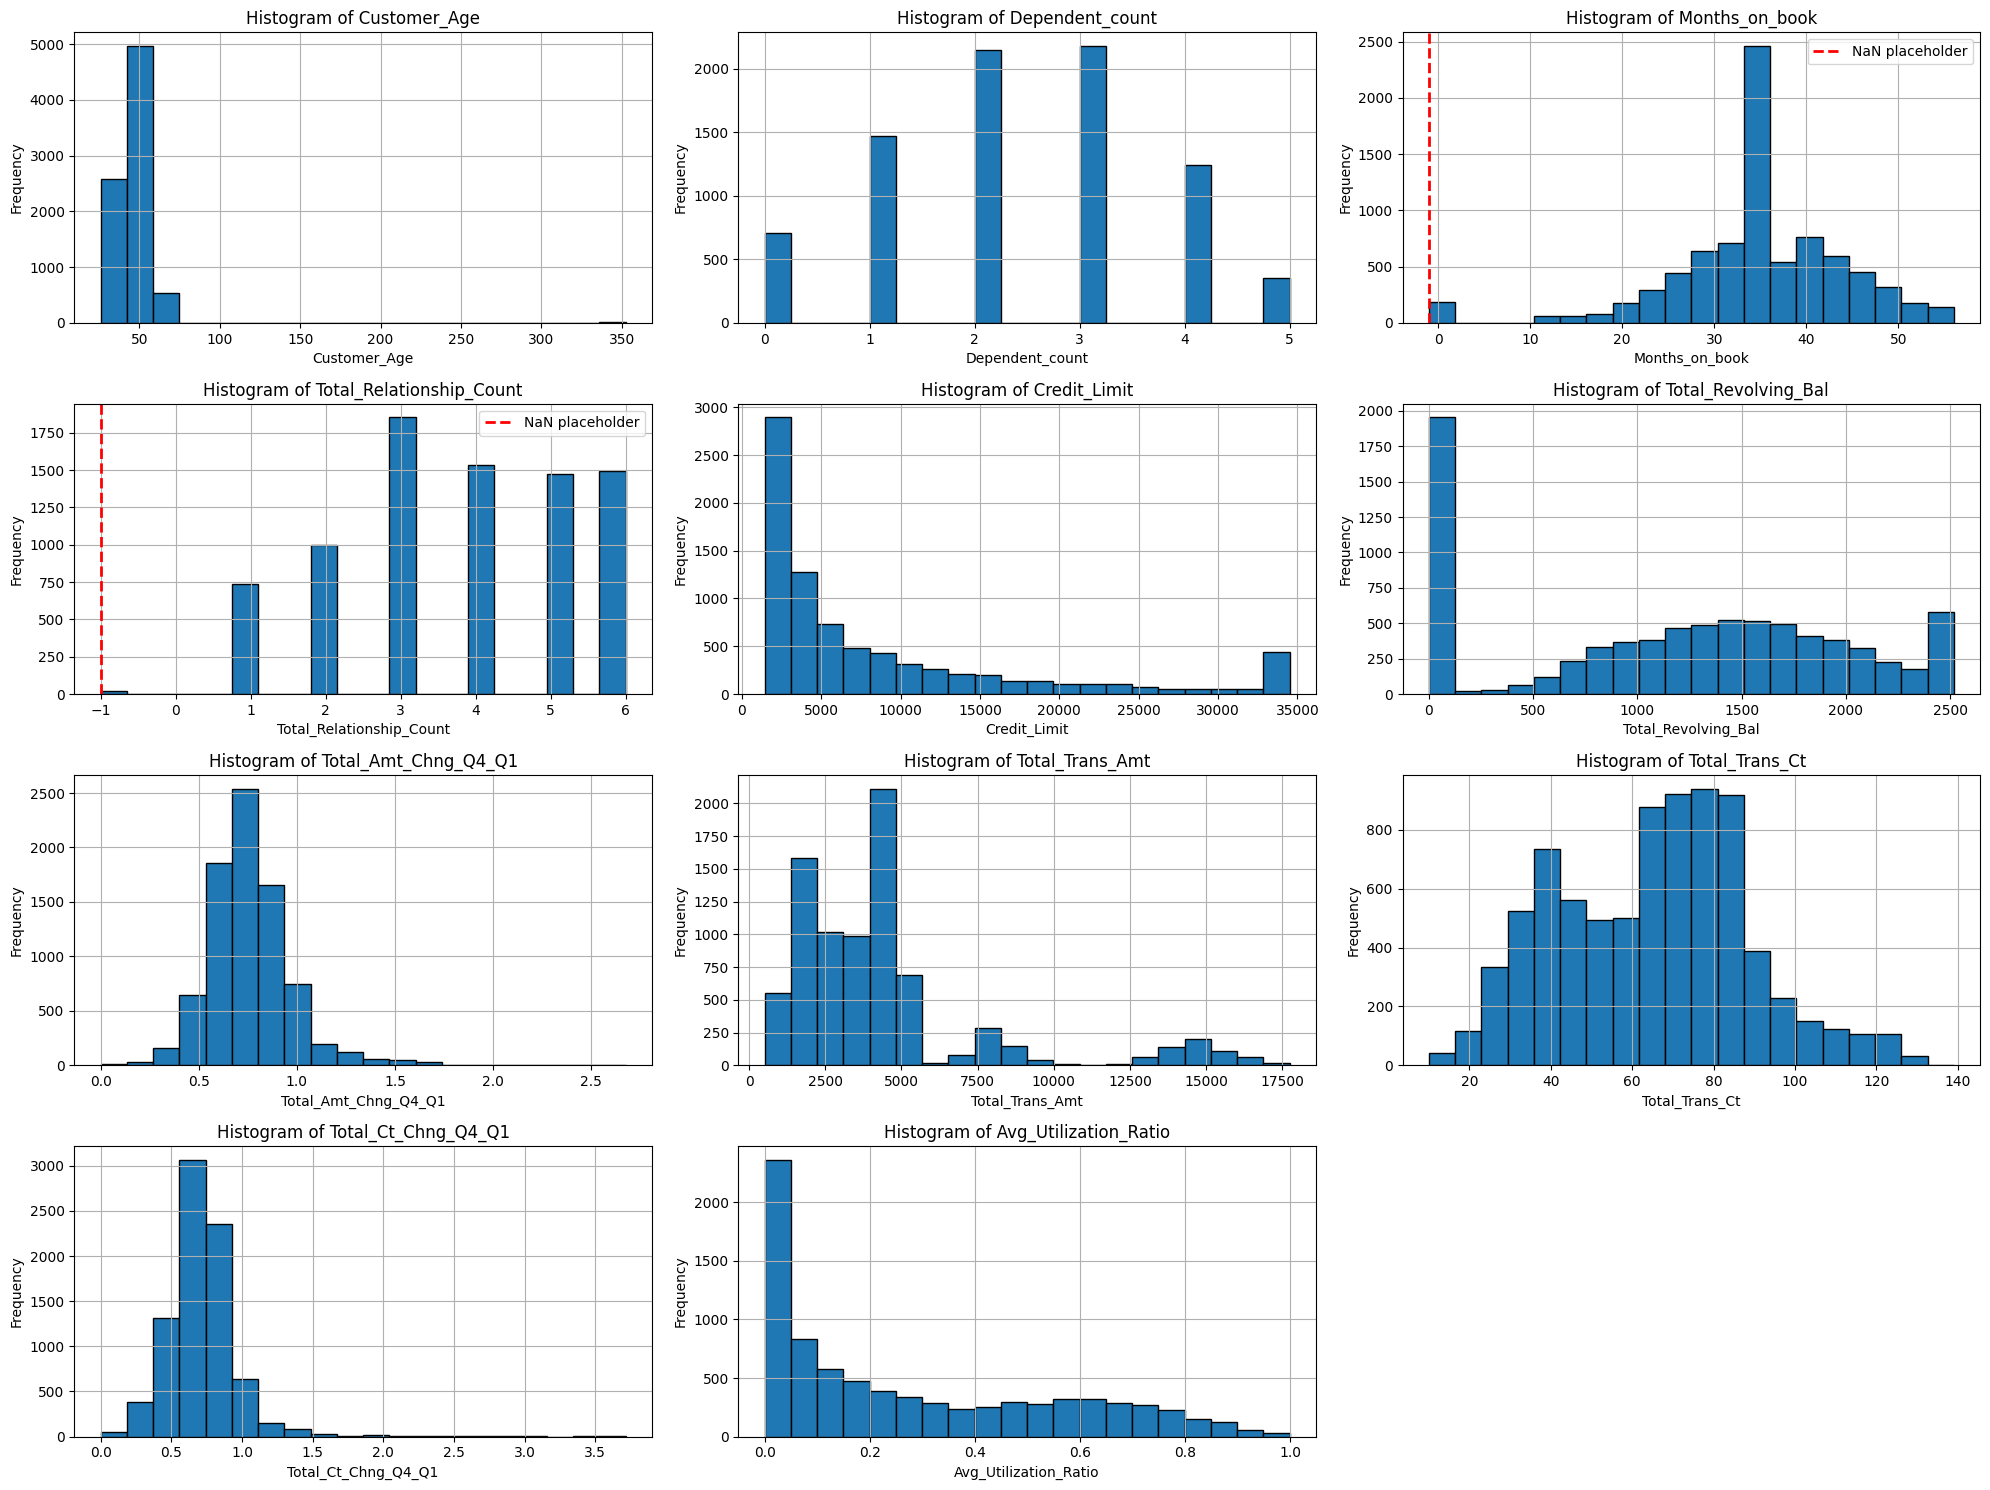

In [10]:
train_df_copy['Customer_Age'] = train_df_copy['Customer_Age'].fillna(-1)
train_df_copy['Months_on_book'] = train_df_copy['Months_on_book'].fillna(-1)
train_df_copy['Total_Relationship_Count'] = train_df_copy['Total_Relationship_Count'].fillna(-1)


numerical_features = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                      'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                      'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']

plt.figure(figsize=(20, 15))

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(4, 3, i)
    train_df_copy[feature].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    if -1 in train_df_copy[feature].values:
        plt.axvline(x=-1, color='red', linestyle='dashed', linewidth=2, label='NaN placeholder')
        plt.legend()

plt.tight_layout()
plt.show()

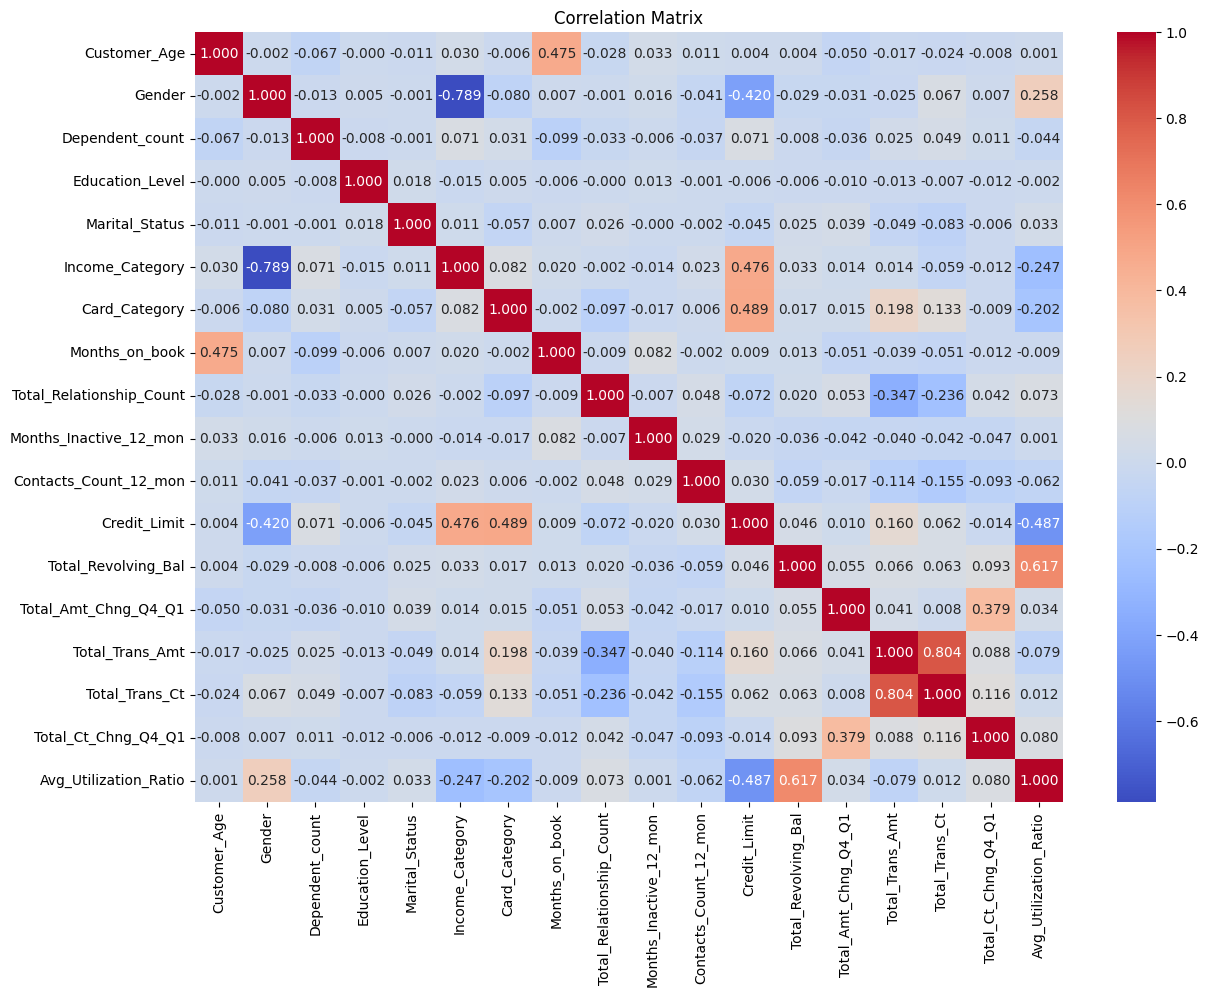

In [11]:
train_df_copy = train_df.copy()

# Define mappings for each categorical feature
gender_mapping = {'M': 0, 'F': 1}
education_mapping = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
marital_mapping = {'Unknown': 0, 'Single': 1, 'Married': 2, 'Divorced': 3}
income_mapping = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}
card_mapping = {'Blue': 0, 'Silver': 1, 'Gold': 2, 'Platinum': 3}

# Apply mapping to each categorical feature
train_df_copy['Gender'] = train_df_copy['Gender'].map(gender_mapping)
train_df_copy['Education_Level'] = train_df_copy['Education_Level'].map(education_mapping)
train_df_copy['Marital_Status'] = train_df_copy['Marital_Status'].map(marital_mapping)
train_df_copy['Income_Category'] = train_df_copy['Income_Category'].map(income_mapping)
train_df_copy['Card_Category'] = train_df_copy['Card_Category'].map(card_mapping)


correlation_matrix = train_df_copy.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".3f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Imputation Gender

train_df['Gender'].describe()

count     7947
unique       2
top          F
freq      4173
Name: Gender, dtype: object

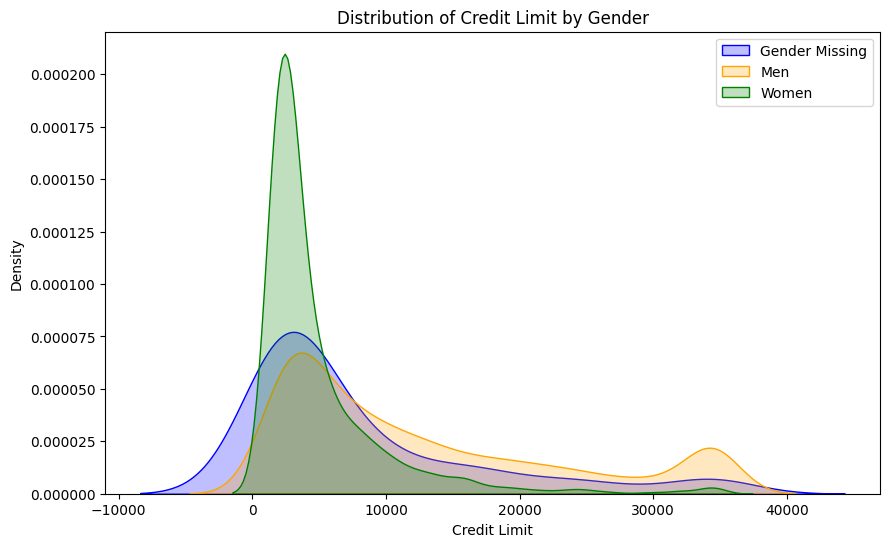

In [13]:
train_df_copy2 = train_df.copy()

df_nan_gender = train_df_copy2[train_df_copy2['Gender'].isna()]
df_men = train_df_copy2[(train_df_copy2['Gender'] == 'M') & train_df_copy2['Gender'].notna()]
df_women = train_df_copy2[(train_df_copy2['Gender'] == 'F') & train_df_copy2['Gender'].notna()]

# Plot KDE plots for credit limit distribution for all groups
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df_nan_gender['Credit_Limit'], label='Gender Missing', fill=True, color='blue')
sns.kdeplot(data=df_men['Credit_Limit'], label='Men', fill=True, color='orange')
sns.kdeplot(data=df_women['Credit_Limit'], label='Women', fill=True, color='green')
plt.title('Distribution of Credit Limit by Gender')
plt.xlabel('Credit Limit')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
# Impute missing values in the 'Gender' column
train_df['Gender'] = train_df['Gender'].fillna('M')

In [15]:
# Encoding 

categorical_features = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

gender_mapping = {'M': 0, 'F': 1}
education_mapping = {'Unknown': 0, 'Uneducated': 1, 'High School': 2, 'College': 3, 'Graduate': 4, 'Post-Graduate': 5, 'Doctorate': 6}
income_mapping = {'Unknown': 0, 'Less than $40K': 1, '$40K - $60K': 2, '$60K - $80K': 3, '$80K - $120K': 4, '$120K +': 5}
card_mapping = {'Blue': 1, 'Silver': 2, 'Gold': 3, 'Platinum': 4}
marital_mapping = {'Unknown': 1, 'Single': 2, 'Married': 3, 'Divorced': 4}


train_df['Gender'] = train_df['Gender'].map(gender_mapping)
train_df['Education_Level'] = train_df['Education_Level'].map(education_mapping)
train_df['Marital_Status'] = train_df['Marital_Status'].map(marital_mapping)
train_df['Income_Category'] = train_df['Income_Category'].map(income_mapping)
train_df['Card_Category'] = train_df['Card_Category'].map(card_mapping)

In [16]:
train_df.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
4984,52.0,1,3,4,3.0,1,NaN,39.0,4.0,3,3,2001.0,909,0.772,4238,63,0.800,0.454
3550,52.0,1,2,2,2.0,1,1.0,40.0,3.0,1,3,1960.0,1428,0.570,3782,64,0.641,0.729
1937,34.0,0,2,4,NaN,4,1.0,29.0,3.0,1,3,13395.0,1678,1.006,2650,69,0.865,0.125
4480,50.0,1,4,2,3.0,2,1.0,36.0,6.0,1,1,1479.0,1004,0.827,5116,75,0.974,0.679
8553,50.0,1,3,2,2.0,1,1.0,42.0,1.0,3,2,1477.0,0,0.685,4680,80,0.778,0.000


In [17]:
# Imputation Total_Relationship_Count & Months_on_book

features_for_imputation = ['Total_Relationship_Count', 'Months_on_book']

imputer = KNNImputer(n_neighbors=5)

train_df[features_for_imputation] = imputer.fit_transform(train_df[features_for_imputation])

In [18]:
# Imputation Marital_Status Card_Category

features_for_imputation = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count',
                           'Credit_Limit', 'Total_Revolving_Bal', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
                           'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
                           'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Gender']

# Initialize IterativeImputer with a linear regression estimator
regressor = LinearRegression()
imp = IterativeImputer(estimator=regressor, missing_values=np.nan, max_iter=10, verbose=2, imputation_order='roman')

# Fit and transform the imputer on the selected features
train_df[features_for_imputation] = imp.fit_transform(train_df[features_for_imputation])

[IterativeImputer] Completing matrix with shape (8105, 16)
[IterativeImputer] Ending imputation round 1/10, elapsed time 0.05
[IterativeImputer] Change: 0.8290678232424968, scaled tolerance: 34.516 
[IterativeImputer] Early stopping criterion reached.


In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8105 entries, 4984 to 7270
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              8105 non-null   float64
 1   Gender                    8105 non-null   float64
 2   Dependent_count           8105 non-null   float64
 3   Education_Level           8105 non-null   float64
 4   Marital_Status            8105 non-null   float64
 5   Income_Category           8105 non-null   float64
 6   Card_Category             8105 non-null   float64
 7   Months_on_book            8105 non-null   float64
 8   Total_Relationship_Count  8105 non-null   float64
 9   Months_Inactive_12_mon    8105 non-null   int64  
 10  Contacts_Count_12_mon     8105 non-null   int64  
 11  Credit_Limit              8105 non-null   float64
 12  Total_Revolving_Bal       8105 non-null   float64
 13  Total_Amt_Chng_Q4_Q1      8105 non-null   float64
 14  Total_Tran